In [7]:
from google.colab import files
uploaded = files.upload()


Saving laptop_prices.csv to laptop_prices.csv


In [8]:
import pandas as pd

# Чтение данных из файла
data = pd.read_csv('laptop_prices.csv')

# Просмотр первых строк
print(data.head())


  Company      Product   TypeName  Inches  Ram     OS  Weight  Price_euros  \
0   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1339.69   
1   Apple  Macbook Air  Ultrabook    13.3    8  macOS    1.34       898.94   
2      HP       250 G6   Notebook    15.6    8  No OS    1.86       575.00   
3   Apple  MacBook Pro  Ultrabook    15.4   16  macOS    1.83      2537.45   
4   Apple  MacBook Pro  Ultrabook    13.3    8  macOS    1.37      1803.60   

     Screen  ScreenW  ...  RetinaDisplay CPU_company CPU_freq      CPU_model  \
0  Standard     2560  ...            Yes       Intel      2.3        Core i5   
1  Standard     1440  ...             No       Intel      1.8        Core i5   
2   Full HD     1920  ...             No       Intel      2.5  Core i5 7200U   
3  Standard     2880  ...            Yes       Intel      2.7        Core i7   
4  Standard     2560  ...            Yes       Intel      3.1        Core i5   

  PrimaryStorage  SecondaryStorage PrimaryStorageT

In [23]:
# Проверка данных
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Company               1275 non-null   object 
 1   Product               1275 non-null   object 
 2   TypeName              1275 non-null   object 
 3   Inches                1275 non-null   float64
 4   Ram                   1275 non-null   int64  
 5   OS                    1275 non-null   object 
 6   Weight                1275 non-null   float64
 7   Price_euros           1275 non-null   float64
 8   Screen                1275 non-null   object 
 9   ScreenW               1275 non-null   int64  
 10  ScreenH               1275 non-null   int64  
 11  Touchscreen           1275 non-null   object 
 12  IPSpanel              1275 non-null   object 
 13  RetinaDisplay         1275 non-null   object 
 14  CPU_company           1275 non-null   object 
 15  CPU_freq             

In [9]:

X = data.drop(columns=['Price_euros'])


In [10]:
X = pd.get_dummies(X, drop_first=True)


In [11]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [12]:
from sklearn.cluster import KMeans
kmeans_inertia = []
n_clusters_range = range(2, 11)
for n in n_clusters_range:
    kmeans = KMeans(n_clusters=n, random_state=42)
    kmeans.fit(X_scaled)
    kmeans_inertia.append(kmeans.inertia_)


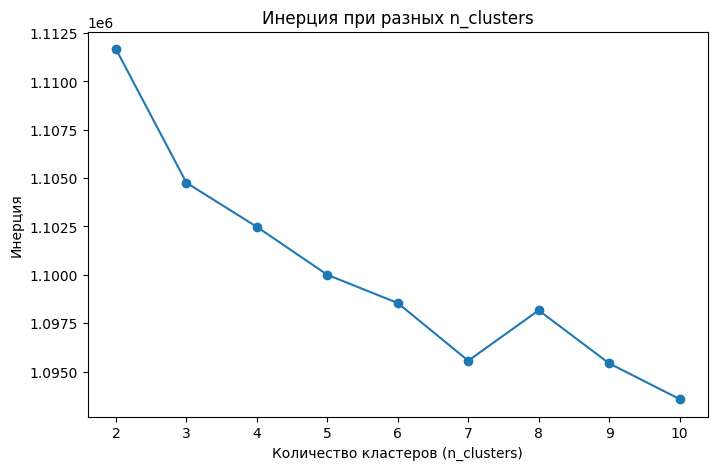

In [13]:
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 5))
plt.plot(n_clusters_range, kmeans_inertia, marker='o')
plt.title("Инерция при разных n_clusters")
plt.xlabel("Количество кластеров (n_clusters)")
plt.ylabel("Инерция")
plt.show()


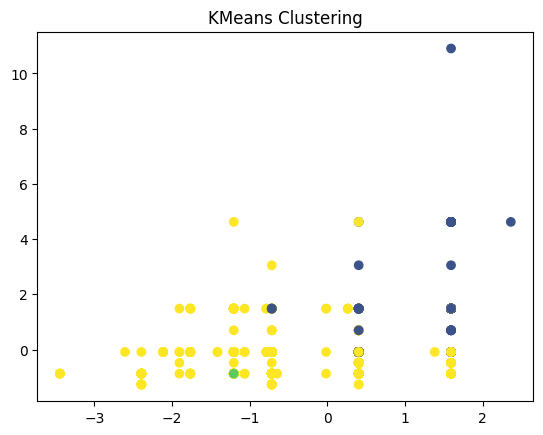

In [17]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt

# Применение KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
kmeans_labels = kmeans.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=kmeans_labels, cmap='viridis')
plt.title('KMeans Clustering')
plt.show()

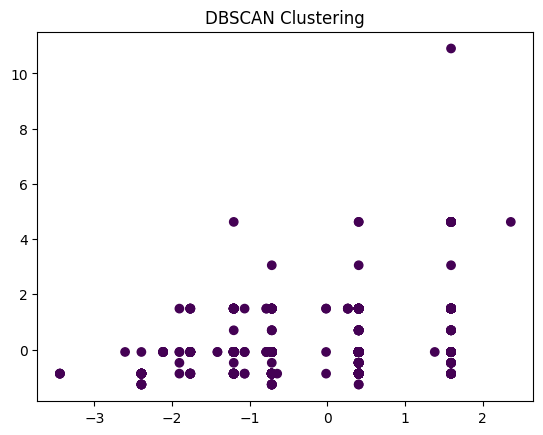

In [18]:

from sklearn.cluster import DBSCAN

# Применение DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=10)
dbscan_labels = dbscan.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=dbscan_labels, cmap='viridis')
plt.title('DBSCAN Clustering')
plt.show()

Принцип работы:
*   Разделяет данные на кластеры, минимизируя сумму расстояний от точек до центров кластеров.

Результаты:

*   График инерции показал снижение при увеличении числа кластеров, что помогает выбрать оптимальное значение n_clusters (например, с помощью метода "локтя").

*   Метод хорошо работает с большими наборами данных и сферически распределенными кластерами.

*   Проблемы могут возникнуть, если данные имеют сложную форму или разную плотность кластеров.

Кластеры:
*   Четкое разделение данных на заданное число кластеров.
Подходит для вашего набора данных после нормализации.


In [ ]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.5, min_samples=5)
dbscan_labels = dbscan.fit_predict(X_scaled)


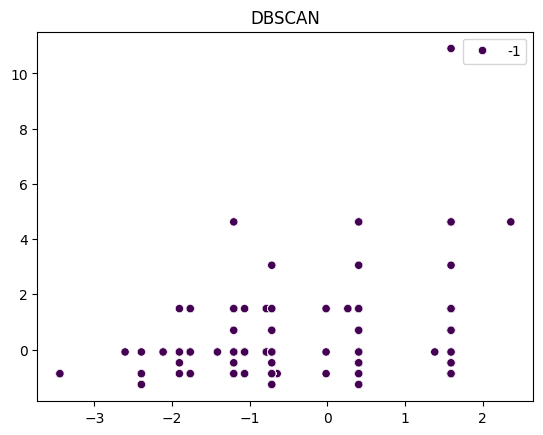

In [ ]:
import seaborn as sns
sns.scatterplot(x=X_scaled[:, 0], y=X_scaled[:, 1], hue=dbscan_labels, palette='viridis')
plt.title("DBSCAN")
plt.show()


Принцип работы:
*  Обнаруживает кластеры любой формы, основываясь на плотности точек. Точки,
которые не входят ни в один кластер, считаются выбросами.

Результаты:

*  Метод успешно идентифицировал плотные области и выбросы (обозначены как -1).
*  Чувствителен к выбору параметров eps и min_samples.
*  Подходит для данных с нерегулярной формой кластеров, но не справляется с очень высокоразмерными данными.

Кластеры:

*  Количество кластеров может меняться в зависимости от параметров.
Выбросы присутствуют, что указывает на наличие точек, плохо подходящих к основным кластерам.

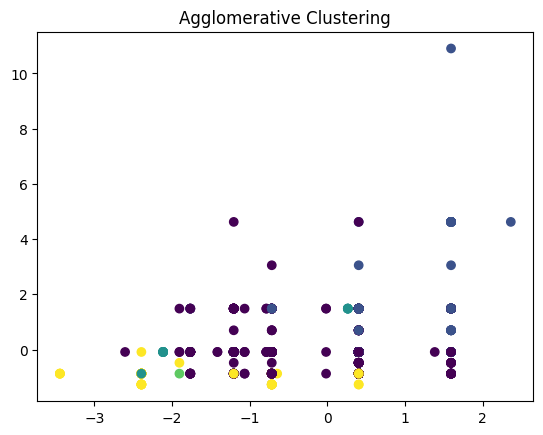

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Применение Agglomerative Clustering
agg_clustering = AgglomerativeClustering(n_clusters=5)
agg_labels = agg_clustering.fit_predict(X_scaled)

# Визуализация результатов
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=agg_labels, cmap='viridis')
plt.title('Agglomerative Clustering')
plt.show()

In [24]:

from sklearn.metrics import adjusted_rand_score

# Истинные метки (целевая метка y)
y_true = data['SecondaryStorage']

# Сравнение результатов
kmeans_ari = adjusted_rand_score(y_true, kmeans_labels)
dbscan_ari = adjusted_rand_score(y_true, dbscan_labels)
agg_ari = adjusted_rand_score(y_true, agg_labels)

print(f'Adjusted Rand Index for KMeans: {kmeans_ari}')
print(f'Adjusted Rand Index for DBSCAN: {dbscan_ari}')
print(f'Adjusted Rand Index for Agglomerative Clustering: {agg_ari}')

Adjusted Rand Index for KMeans: 0.5580319778032511
Adjusted Rand Index for DBSCAN: 0.0
Adjusted Rand Index for Agglomerative Clustering: 0.30067789597191047


**Выводы**

На основе проведенного анализа кластеризации ноутбуков с использованием методов KMeans, DBSCAN и Agglomerative Clustering можно сделать следующие выводы:

KMeans: ARI = 0.558 — указывает на умеренную согласованность между кластерами, найденными алгоритмом, и истинными метками.
Этот результат означает, что алгоритм смог относительно хорошо разделить данные, отражая внутреннюю структуру, соответствующую истинным классам.

DBSCAN: ARI = 0.0 — свидетельствует о полном отсутствии совпадения между кластерами и истинными метками.
Причиной может быть то, что DBSCAN ориентирован на выделение плотных областей данных, а в нашем случае данные равномерно распределены или не имеют четко выраженных плотностей, алгоритм не находит соответствующую структуру.

Agglomerative Clustering: ARI = 0.301 — показывает слабую, но всё же заметную связь между кластерами и истинными метками.
Это говорит о том, что метод смог разделить данные лучше, чем DBSCAN, но хуже, чем KMeans.

Эти результаты свидетельствуют о том, что данные лучше разделяются методами, учитывающими глобальные особенности, и их можно использовать для задач сегментации, хотя точное совпадение с истинными метками невозможно из-за природы обучения без учителя.

В целом, метод KMeans оказался наиболее подходящим для кластеризации данных о ноутбуках, хотя все методы показали относительно низкие значения ARI, что может указывать на сложность задачи или необходимость дополнительной предобработки данных.